In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pwd

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/content/drive/My Drive/NLP


In [ ]:
WORKING_PATH = '/content/drive/MyDrive/NLP'

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%cd {WORKING_PATH}

/content/drive/MyDrive/NLP


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!ls

'1. Introduccion.pdf'				        datos_prepocesados.csv	  requirements.txt
'2.Introduccion al Procesado de Lenguaje Natural.pdf'  'Práctica final NLP.pdf'   Soluciones
 Clases						        Proyecto_final		  utils.py
 Datasets					        __pycache__		  w2v_model.pkl


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install -r requirements.txt

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load
from google.colab import drive
from sklearn.feature_selection import chi2
import spacy
from textblob import TextBlob
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gemsimvis
pyLDAvis.enable_notebook()

import inflect
import re

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Cargar el archivo de datos prepocesados
df = pd.read_csv('/content/drive/MyDrive/NLP/datos_prepocesados.csv')
print(df.head())

   overall  verified   reviewTime      reviewerID        asin  \
0        5      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1        5      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2        1      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3        5     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4        5      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   

                                               style     reviewerName  \
0  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...     houserules18   
2  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...             Adam   
3  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...           Rich K   
4                          {'Size:': ' 200ml/6.7oz'}  C. C. Christian   

                                          reviewText  \
0                   As advertised. Reasonably priced   
1  Like the oder and the feel when I put it on my...   
2 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:


#funcion para asignar etiquetas binarias
def asignar_etiqueta(overall):
  if overall >= 4: #ajustar el umbral
    return 1
  else:
    return 0

#Aplicamos la funcion para crear la etiqueta binaria
df['sentiment_label']=df['overall'].apply(asignar_etiqueta)


#Divido los datos en entrenamiento y prueba
X = df['reviewTextProcesado']
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.75,
    test_size=0.25,
    random_state=42,
    shuffle=True)
X_train.iloc[:10]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,reviewTextProcesado
3830,expect
1187,love year bath body discontinue think look onl...
188,product year control fritz humid day
2414,christmas present son love variety inviting lo...
5123,happy product
2574,compliment wear lotion
706,alien favorite year compliment
3225,like product paradefree execution fall flat fa...
270,want skin moisturize feel absolutely great buy...
3478,love fresh scent


In [ ]:
print(df.head())

   overall  verified   reviewTime      reviewerID        asin  \
0        5      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1        5      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2        1      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3        5     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4        5      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   

                                               style     reviewerName  \
0  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...     houserules18   
2  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...             Adam   
3  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...           Rich K   
4                          {'Size:': ' 200ml/6.7oz'}  C. C. Christian   

                                          reviewText  \
0                   As advertised. Reasonably priced   
1  Like the oder and the feel when I put it on my...   
2 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_train.iloc[:10]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment_label
3830,1
1187,1
188,1
2414,1
5123,1
2574,1
706,1
3225,0
270,1
3478,1


In [ ]:
#Miramos si hay valores Nan
print(X_train.isna().sum())
print(X_test.isna().sum())

7
4


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Los valores nulos los pongo cadena vacia
X_train=X_train.fillna('')
X_test=X_test.fillna('')

#Verifico que no hay valores Nan
print(X_train.isna().sum())
print(X_test.isna().sum())

0
0


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Extracción features
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 1)
)
cv.fit(X_train)

TfidfVectorizer(max_df=0.95, max_features=2500, min_df=3, strip_accents='ascii')

In [ ]:
print(list(cv.vocabulary_.items())[:10])

[('expect', 768), ('love', 1262), ('year', 2431), ('bath', 207), ('body', 268), ('discontinue', 632), ('think', 2198), ('look', 1252), ('online', 1476), ('glad', 930)]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(len(cv.vocabulary_))

2441


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#TF-IDF scores del training set y test set
X_train_ = cv.transform(X_train)
X_test_ = cv.transform(X_test)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
words_example = [
    'happy',
    'love',
    'product',
    'shampoo',
    'time',
    'good',
    'smell',
    'hair',
    'and'
]
#creo un diccionario
vocab_idf = dict(zip(cv.get_feature_names_out(), cv.idf_))

print('{0:20}{1:20}'.format('Palabra', 'IDF'))
for word in words_example:
  if word not in vocab_idf:
    print('{0:20}{1:20}'.format(word, 'OOV'))
  else:
    print('{0:20}{1:20}'.format(word, vocab_idf[word]))


Palabra             IDF                 
happy                  4.384137258916847
love                  2.2232189063490937
product                2.212953632289499
shampoo                3.139939653280402
time                   3.258529465906726
good                   2.534390532038443
smell                 2.6460305031811124
hair                   2.720946392971186
and                 OOV                 


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Palabras con TDF en alguna review
i = random.randint(0, len(X_train))
print('ID: {}'.format(i))
print('Sentiment:{}'.format(y_train.iloc[i]))
print('Review:{}'.format(X_train.iloc[i]))

ID: 1675
Sentiment:1
Review:soap wonderful treat rose bouquet unwrap bar scent remain soap lather thick rich longlaste bar soap want treat select favorite scent pre de province


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
doc_vector = X_train_[i]
df_tfidf = pd.DataFrame(doc_vector.T.todense(), index=cv.get_feature_names_out(), columns=['tfidf'])
df_tfidf = df_tfidf[df_tfidf['tfidf'] > 0]

top_n = 10
print('Top {} words with highest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[:top_n]))
print('\nTop {} words with lowest TF_IDF in the review {}:\n{}'.format(top_n, i, df_tfidf.sort_values(by=["tfidf"],ascending=False)[-top_n:]))

Top 10 words with highest TF_IDF in the review 1675:
              tfidf
treat      0.448120
soap       0.412570
bar        0.349467
rose       0.279690
longlaste  0.250948
remain     0.229155
scent      0.223778
rich       0.200413
pre        0.185632
de         0.184012

Top 10 words with lowest TF_IDF in the review 1675:
              tfidf
scent      0.223778
rich       0.200413
pre        0.185632
de         0.184012
province   0.183487
thick      0.176410
lather     0.169055
want       0.149262
wonderful  0.146706
favorite   0.131925


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:13: DeprecationWarning: invalid escape sequence '\c'
<>:15: DeprecationWarning: invalid escape sequence '\c'
<>:13: DeprecationWarning: invalid escape sequence '\c'
<>:15: DeprecationWarning: invalid escape sequence '\c'
<ipython-input-32-89484edf0d0f>:13: DeprecationWarning: invalid escape sequence '\c'
  plt.xlabel('$\chi^2$', fontsize=26)
<ipython-input-32-89484edf0d0f>:15: DeprecationWarning: invalid escape sequence '\c'
  plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)


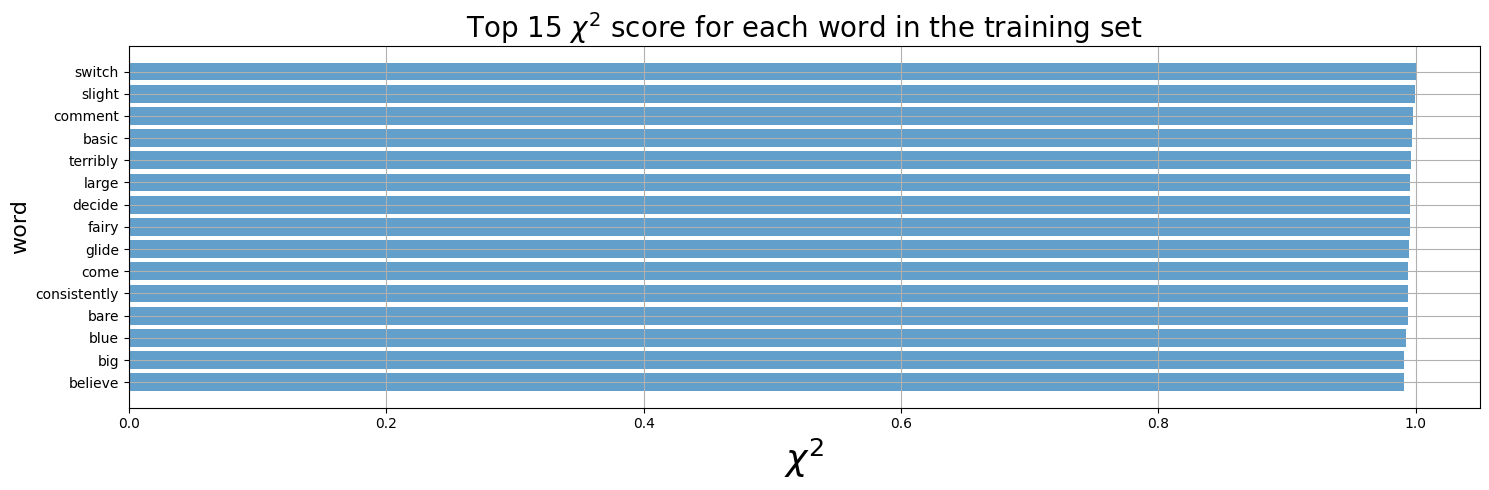

In [ ]:
#X2 scores, vamos a ver que palabras son mas relevantes
i = 15
chi2score = chi2(X_train_, y_train)[1]
scores = list(zip(cv.get_feature_names_out(), chi2score))
sorted_scores = sorted(scores, key=lambda x: x[1])
topchi2=list(zip(*sorted_scores[-i:]))
x=range(len(topchi2[1]))
labels = topchi2[0]

plt.figure(figsize=(15, 5))
plt.barh(x, topchi2[1], align='center', alpha=0.7)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$', fontsize=26)
plt.ylabel('word', fontsize=16)
plt.title('Top {} $\chi^2$ score for each word in the training set'.format(i), fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#entrenamiento
c_params = [0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 10000]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=500)
    lr.fit(X_train_, y_train)

    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)

    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))

    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy for C=0.01: 0.9453717754172989
Accuracy for C=0.05: 0.9453717754172989
Accuracy for C=0.25: 0.9453717754172989
Accuracy for C=0.5: 0.9453717754172989
Accuracy for C=1: 0.9650986342943855
Accuracy for C=10: 0.988619119878604
Accuracy for C=100: 0.988619119878604
Accuracy for C=1000: 0.9893778452200304
Accuracy for C=10000: 0.9893778452200304


In [ ]:
#metricas
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(accuracy_score(y_test, test_predict)))

Confussion matrix:
[[  59   13]
 [   1 1245]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89        72
           1       0.99      1.00      0.99      1246

    accuracy                           0.99      1318
   macro avg       0.99      0.91      0.94      1318
weighted avg       0.99      0.99      0.99      1318

Accuracy score:0.9893778452200304


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import random

def predict_review_sentiment(review_index, model):
    try:
        actual_sentiment = df.iloc[review_index]['sentiment_label']
        print('Actual sentiment: {}'.format(actual_sentiment))
        r = df.iloc[review_index]['reviewTextProcesado']
        prediction = model.predict(cv.transform([r]))
        print('Prediction: {}'.format(prediction[0]))
    except KeyError as e:
        print("KeyError: La columna especificada no existe en el DataFrame. Detalles: {}".format(e))
    except IndexError as e:
        print("IndexError: El índice de la revisión está fuera de rango. Detalles: {}".format(e))

# Muestra las predicciones para 5 muestras aleatorias
for i in random.sample(range(0, len(df)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)



Review no. 3697
Actual sentiment: 1
Prediction: 1

Review no. 3602
Actual sentiment: 1
Prediction: 1

Review no. 417
Actual sentiment: 1
Prediction: 1

Review no. 3558
Actual sentiment: 1
Prediction: 1

Review no. 4101
Actual sentiment: 1
Prediction: 1


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Parece sobreajustado, seguimos viendo otras cosas
##############

In [ ]:
df.shape

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(5269, 14)

In [ ]:
df.head()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewTextProcesado,sentiment_label
0,5,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN,advertise reasonably price,1
1,5,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,NaN,NaN,like oder feel face try band review people kno...,1
2,1,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,NaN,NaN,buy smell nice shave smell awful nineteen smel...,0
3,5,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN,hey anna vulva man absolutely love stuff year ...,1
4,5,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,3,NaN,want feel pamper shampoo smell like wonderful ...,1


In [ ]:
#Analisis de topicos con LDA

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Tokenizacion

df['reviewTextProcesado'] = df['reviewTextProcesado'].apply(safe_string_conversion)

processed_texts = df['reviewTextProcesado'].apply(lambda text: text.split()).tolist()
print(processed_texts)


[['advertise', 'reasonably', 'price'], ['like', 'oder', 'feel', 'face', 'try', 'band', 'review', 'people', 'know', 'prefer', 'oder', 'brand', 'hard', 'face', 'dry', 'leave', 'dry', 'skin'], ['buy', 'smell', 'nice', 'shave', 'smell', 'awful', 'nineteen', 'smell', 'like', 'grandmother', 'perfume'], ['hey', 'anna', 'vulva', 'man', 'absolutely', 'love', 'stuff', 'year', 'true', 'shave', 'lotion', 'classic', 'sure', 'woman', 'attract', 'anna', 'vulva', 'know', 'sure', 'count', 'ha', 'sure', 'long', 'williams', 'company', 'run', 'paper', 'advertisement', 'take', 'thousand', 'fortynine', 'magazine', 'feature', 'ralph', 'belly', 'detective', 'story', 'ohio', 'penza', 'south', 'pacific', 'anna', 'vulva', 'shave', 'lotion', 'sure', 'remember', 'ralph', 'belly', 'ohio', 'penza', '40', 'right', 'slogan', 'like', 'anna', 'vulva', 'man', 'work', 'hot', 'item', 'young', 'man', 'amazing', 'vast', 'majority', 'shave', 'lotion', 'time', 'period', 'disappear', 'year', 'negative', 'anna', 'vulva', 'long',

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.corpora import Dictionary  # Importa la clase Dictionary
#Crear diccionario
dictionary = Dictionary(processed_texts)
type(dictionary)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


gensim.corpora.dictionary.Dictionary

In [ ]:
list(dictionary.items())


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 'advertise'),
 (1, 'price'),
 (2, 'reasonably'),
 (3, 'band'),
 (4, 'brand'),
 (5, 'dry'),
 (6, 'face'),
 (7, 'feel'),
 (8, 'hard'),
 (9, 'know'),
 (10, 'leave'),
 (11, 'like'),
 (12, 'oder'),
 (13, 'people'),
 (14, 'prefer'),
 (15, 'review'),
 (16, 'skin'),
 (17, 'try'),
 (18, 'awful'),
 (19, 'buy'),
 (20, 'grandmother'),
 (21, 'nice'),
 (22, 'nineteen'),
 (23, 'perfume'),
 (24, 'shave'),
 (25, 'smell'),
 (26, '40'),
 (27, 'absolutely'),
 (28, 'advertisement'),
 (29, 'amazing'),
 (30, 'ambergris'),
 (31, 'anna'),
 (32, 'aroma'),
 (33, 'attract'),
 (34, 'belly'),
 (35, 'classic'),
 (36, 'come'),
 (37, 'company'),
 (38, 'container'),
 (39, 'count'),
 (40, 'detective'),
 (41, 'disappear'),
 (42, 'dissipate'),
 (43, 'enable'),
 (44, 'expensive'),
 (45, 'feature'),
 (46, 'fortynine'),
 (47, 'glass'),
 (48, 'great'),
 (49, 'ha'),
 (50, 'hey'),
 (51, 'hot'),
 (52, 'hour'),
 (53, 'item'),
 (54, 'linger'),
 (55, 'long'),
 (56, 'lotion'),
 (57, 'love'),
 (58, 'magazine'),
 (59, 'majority')

In [ ]:
#Crea el corpus
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1)],
 [(3, 1),
  (4, 1),
  (5, 2),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(11, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 3)],
 [(9, 1),
  (11, 2),
  (15, 1),
  (17, 1),
  (19, 1),
  (23, 1),
  (24, 5),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 5),
  (32, 2),
  (33, 1),
  (34, 2),
  (35, 2),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 3),
  (56, 4),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 3),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),


In [ ]:
processed_texts[0]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['advertise', 'reasonably', 'price']

In [ ]:
corpus[0]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1)]

In [ ]:
#entrenamos modelo (LDA)
#descubrir los temas ocultos o tópicos dentro de una coleccion de documentos
from gensim.models import LdaModel  # Importa la clase LdaModel
from gensim.models import CoherenceModel  # Importa la clase CoherenceModel
def train_lda_model(num_topics):
  lda_model = LdaModel(
      corpus=corpus,
      id2word=dictionary,
      num_topics=num_topics,
      iterations = 10, # para mejor convergencia aumento iteracciones
      passes=10, #Aumento los pases para  mejorar la convergencia
      alpha = 'auto'
  )
  return lda_model

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Evaluar el modelo
def evaluate_lda_model(lda_model):
  perplexity = lda_model.log_perplexity(corpus)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
  coherence = coherence_model_lda.get_coherence()
  return perplexity, coherence

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Visualizacion interactiva
def visualize_topics(lda_model):
  vis = gemsimvis.prepare(lda_model, corpus, dictionary)
  pyLDAvis.display(vis)
  pyLDAvis.save_html(vis, './content/drive/MyDrive/NLP/Proyecto_final/lda_vis.html')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Encontrar el numero optimo de topics(uso coherencia)
coherence_values = []
num_topics_range = range(2, 11)

for num_topics in num_topics_range:
  print(f'Entrenado el modelo con {num_topics} topicos')
  lda_model = train_lda_model(num_topics)
  perplexity, coherence = evaluate_lda_model(lda_model)
  coherence_values.append(coherence)
  print(f'Perplejidad: {perplexity}, Coherencia: {coherence}')

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Entrenado el modelo con 2 topicos
Perplejidad: -6.774001302296346, Coherencia: 0.49180693169554485
Entrenado el modelo con 3 topicos
Perplejidad: -6.734293254582583, Coherencia: 0.5000542782659757
Entrenado el modelo con 4 topicos
Perplejidad: -6.710751017577978, Coherencia: 0.5247138521771926
Entrenado el modelo con 5 topicos
Perplejidad: -6.7023711164970745, Coherencia: 0.48475681762486095
Entrenado el modelo con 6 topicos
Perplejidad: -6.722216615432096, Coherencia: 0.4755421824545743
Entrenado el modelo con 7 topicos
Perplejidad: -6.692356148450835, Coherencia: 0.4802322933468632
Entrenado el modelo con 8 topicos
Perplejidad: -6.70845789698485, Coherencia: 0.4485368416662445
Entrenado el modelo con 9 topicos
Perplejidad: -6.691239000441858, Coherencia: 0.4516417609666801
Entrenado el modelo con 10 topicos
Perplejidad: -6.672672736712282, Coherencia: 0.47008135758893266


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


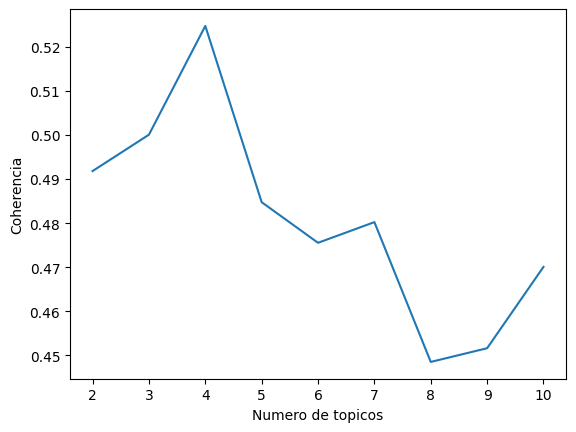

In [ ]:
#Ver los valores de coherencia
plt.plot(num_topics_range, coherence_values)
plt.xlabel('Numero de topicos')
plt.ylabel('Coherencia')
plt.show()

In [ ]:
#Modelo final con el numero optimo de topics, despues de ver la gráfica el 5
optimal_num_topics = 5
final_lda_model = train_lda_model(optimal_num_topics)
data =[]
for i in range(final_lda_model.num_topics):
  topic_words = final_lda_model.show_topic(i, topn=20)
  for topic_word, prob in topic_words:
    data.append({'Topic': 'Topic #{:02d}'.format(i + 1), 'Word': topic_word, 'Probability': prob})

df_topic_words = pd.DataFrame(data)
print(df_topic_words)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


        Topic     Word  Probability
0   Topic #01     love     0.070365
1   Topic #01  product     0.059860
2   Topic #01    great     0.054347
3   Topic #01    smell     0.035512
4   Topic #01     good     0.032476
..        ...      ...          ...
95  Topic #05     time     0.005437
96  Topic #05   little     0.005392
97  Topic #05   polish     0.005385
98  Topic #05      dry     0.005385
99  Topic #05     wear     0.005034

[100 rows x 3 columns]


In [ ]:
#Pañabras clave por topico(diccionario)
word_dict = df_topic_words.groupby('Topic').apply(lambda x: dict(zip(x['Word'], x['Probability']))).to_dict()
# Imprimir cada tópico en una columna separada
for topic, words in word_dict.items():
    print(f'\nTópico {topic}:')
    for word, probability in words.items():
        print(f'    {word}: {probability}')


Tópico Topic #01:
    love: 0.07036499679088593
    product: 0.059860266745090485
    great: 0.05434694141149521
    smell: 0.035511888563632965
    good: 0.0324755422770977
    buy: 0.021010179072618484
    skin: 0.016472570598125458
    find: 0.016330536454916
    scent: 0.014441699720919132
    favorite: 0.012080125510692596
    price: 0.012076210230588913
    like: 0.011417889036238194
    body: 0.01130867749452591
    use: 0.010847873985767365
    year: 0.010302682407200336
    feel: 0.009939249604940414
    stuff: 0.00920783169567585
    shower: 0.008917492814362049
    wish: 0.008526168763637543
    clean: 0.008369328454136848

Tópico Topic #02:
    hair: 0.08194126188755035
    shampoo: 0.04163896664977074
    product: 0.022647768259048462
    condition: 0.018645748496055603
    use: 0.01722671277821064
    feel: 0.014640646986663342
    dry: 0.014065461233258247
    like: 0.012504581362009048
    long: 0.011863745748996735
    leave: 0.01183838676661253
    good: 0.0114912306

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-149-508602b3e5a8>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  word_dict = df_topic_words.groupby('Topic').apply(lambda x: dict(zip(x['Word'], x['Probability']))).to_dict()


In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_data = []
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # Dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_data.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break

    sent_topics_df = pd.DataFrame(sent_topics_data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
    contents = pd.Series(texts) # Asegúrate que 'texts' esté definido
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    # Renombrar la columna de textos (opcional)
    sent_topics_df = sent_topics_df.rename(columns={0: 'Text'})  # Cambia 0 por el nombre correcto si es diferente

    return(sent_topics_df)

df_topic_distribution = format_topics_sentences(final_lda_model, corpus, processed_texts)

# Formateo (como lo has hecho, pero con algunas mejoras)
df_dominant_topic = df_topic_distribution.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Topic_Keywords', 'Text']

# 1. Convertir 'Dominant_Topic' a entero (si es necesario)
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic'].astype(int)

# 2. Agregar una columna con el número de tópico + 1 (opcional, para mejor legibilidad)
df_dominant_topic['Topic_Number'] = df_dominant_topic['Dominant_Topic'] + 1

# 3. Ordenar
df_dominant_topic









/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Topic_Keywords,Text,Topic_Number
0,0,3,0.7517,"smell, like, time, good, find, body, skin, pri...","[advertise, reasonably, price]",4
1,1,3,0.5857,"smell, like, time, good, find, body, skin, pri...","[like, oder, feel, face, try, band, review, pe...",4
2,2,2,0.5764,"soap, scent, bar, like, lavender, skin, smell,...","[buy, smell, nice, shave, smell, awful, ninete...",3
3,3,0,0.5648,"love, product, great, smell, good, buy, skin, ...","[hey, anna, vulva, man, absolutely, love, stuf...",1
4,4,1,0.7522,"hair, shampoo, product, condition, use, feel, ...","[want, feel, pamper, shampoo, smell, like, won...",2
...,...,...,...,...,...,...
5264,5264,3,0.5940,"smell, like, time, good, find, body, skin, pri...","[genetic, undereye, darkness, accept, long, ti...",4
5265,5265,0,0.6442,"love, product, great, smell, good, buy, skin, ...","[absolutely, love, eye]",1
5266,5266,4,0.9138,"use, like, brush, look, work, toothpaste, easy...","[eye, easy, apply, use, morning, night, cool, ...",5
5267,5267,0,0.4853,"love, product, great, smell, good, buy, skin, ...","[ok, eye, good, stuff]",1


In [ ]:
#Agrupo pot topic y contar documentos
topic_counts = df_dominant_topic.groupby('Topic_Number')['Document_No'].count()
print("Cantidad de documentos por tópico:\n", topic_counts)

# Obtener información sobre los documentos en cada tópico (ejemplo: primeros 5 documentos)
for topic in df_dominant_topic['Topic_Number'].unique():
    print(f"\nDocumentos en el tópico {topic}:\n", df_dominant_topic[df_dominant_topic['Topic_Number'] == topic].head())

Cantidad de documentos por tópico:
 Topic_Number
1    2556
2    1097
3     575
4     510
5     531
Name: Document_No, dtype: int64

Documentos en el tópico 4:
     Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0             0               3              0.7517   
1             1               3              0.5857   
58           58               3              0.4091   
62           62               3              0.7208   
72           72               3              0.6219   

                                       Topic_Keywords  \
0   smell, like, time, good, find, body, skin, pri...   
1   smell, like, time, good, find, body, skin, pri...   
58  smell, like, time, good, find, body, skin, pri...   
62  smell, like, time, good, find, body, skin, pri...   
72  smell, like, time, good, find, body, skin, pri...   

                                                 Text  Topic_Number  
0                      [advertise, reasonably, price]             4  
1   [like, oder, feel, fac

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Busco documentos con ciertas palbaras claves
palabras_clave = ["shampoo", "conditioner", "hair"]  # Palabras clave a buscar

# Crear una máscara booleana para cada palabra clave
mascaras = [df_dominant_topic['Text'].apply(lambda x: palabra in x) for palabra in palabras_clave]

# Combinar las máscaras booleanas (usando OR)
mascara_combinada = pd.concat(mascaras, axis=1).any(axis=1)

# Filtrar el DataFrame para obtener los documentos que contienen al menos una palabra clave
documentos_con_palabras_clave = df_dominant_topic[mascara_combinada]
print("\nDocumentos que contienen palabras clave:\n", documentos_con_palabras_clave)


Documentos que contienen palabras clave:
       Document_No  Dominant_Topic  Topic_Perc_Contrib  \
4               4               1              0.7522   
6               6               1              0.9487   
7               7               1              0.5663   
8               8               1              0.7158   
9               9               1              0.7851   
...           ...             ...                 ...   
5231         5231               3              0.4104   
5233         5233               0              0.8196   
5237         5237               4              0.8046   
5239         5239               3              0.7604   
5252         5252               1              0.7368   

                                         Topic_Keywords  \
4     hair, shampoo, product, condition, use, feel, ...   
6     hair, shampoo, product, condition, use, feel, ...   
7     hair, shampoo, product, condition, use, feel, ...   
8     hair, shampoo, product, condit

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


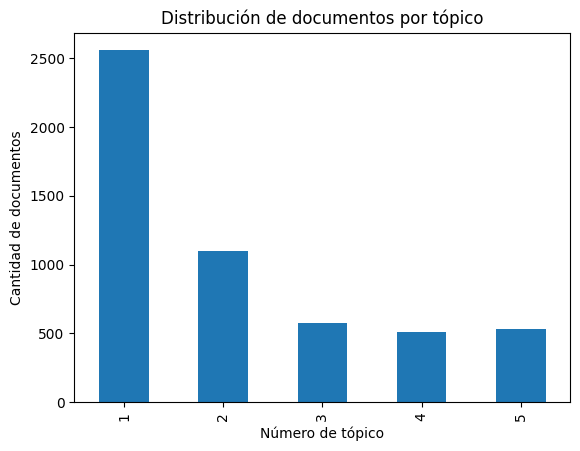

In [ ]:
#Número de tópico')
topic_counts = df_dominant_topic['Topic_Number'].value_counts().sort_index()
topic_counts.plot(kind='bar')
plt.ylabel('visualizacion de los topicos)
plt.title('Distribución de documentos por tópico')
plt.xlabel('Cantidad de documentos')
plt.show()

In [ ]:
#Explorar documento de un topico especifico
topico_interes = 3  # Número del tópico que te interesa

documentos_topico = df_dominant_topic[df_dominant_topic['Topic_Number'] == topico_interes]
print(f"\nDocumentos en el tópico {topico_interes}:\n", documentos_topico)


Documentos en el tópico 3:
       Document_No  Dominant_Topic  Topic_Perc_Contrib  \
2               2               2              0.5764   
33             33               2              0.5162   
37             37               2              0.8585   
41             41               2              0.7347   
71             71               2              0.4218   
...           ...             ...                 ...   
5189         5189               2              0.5528   
5191         5191               2              0.6998   
5198         5198               2              0.6787   
5207         5207               2              0.5612   
5227         5227               2              0.3925   

                                         Topic_Keywords  \
2     soap, scent, bar, like, lavender, skin, smell,...   
33    soap, scent, bar, like, lavender, skin, smell,...   
37    soap, scent, bar, like, lavender, skin, smell,...   
41    soap, scent, bar, like, lavender, skin, smel

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Buscar el documento mas represenativo por topico
documentos_representativos = df_dominant_topic.loc[df_dominant_topic.groupby('Topic_Number')['Topic_Perc_Contrib'].idxmax()]
print("\nDocumentos más representativos por tópico:\n", documentos_representativos)


Documentos más representativos por tópico:
       Document_No  Dominant_Topic  Topic_Perc_Contrib  \
859           859               0              0.9875   
26             26               1              0.9767   
4196         4196               2              0.9853   
3375         3375               3              0.9600   
1273         1273               4              0.9901   

                                         Topic_Keywords  \
859   love, product, great, smell, good, buy, skin, ...   
26    hair, shampoo, product, condition, use, feel, ...   
4196  soap, scent, bar, like, lavender, skin, smell,...   
3375  smell, like, time, good, find, body, skin, pri...   
1273  use, like, brush, look, work, toothpaste, easy...   

                                                   Text  Topic_Number  
859   [love, product, buy, mon, christmas, give, lov...             1  
26    [selenium, appear, search, result, look, organ...             2  
4196  [review, bath, salt, pre, de, provi

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
